# トピックについての時系列を分析する

In [1]:
# 必要なライブラリをインポート
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import json

# Jupyter Notebook用の設定
%matplotlib inline

In [13]:
# データを読み込む
data_path = 'data/processed/android_cleaned_mecab_with_topics.csv'

df = pd.read_csv(data_path)

# データの確認
df.head()

,id,userName,userImage,date,score,scoreText,url,title,text,replyDate,...,version,thumbsUp,criterias,positive_review,negative_review,positive_review_keywords,negative_review_keywords,topic,topic_probability,topic_name
0,9e31e6b7-605a-4b6b-9146-5a17644ba6b8,シュン,https://play-lh.googleusercontent.com/a/ACg8oc...,2024-11-23T14:01:42.496Z,1,1,https://play.google.com/store/apps/details?id=...,NaN,インストール済みアプリの広告動画で✕ボタンを押しそこねた場合、そのアプリが起動するのが凄く邪...,2024-09-16T08:11:04.465Z,...,9.6.2,70,[],-,- インストール済みアプリの広告動画で✕ボタンを押しそこねるとそのアプリが起動し、これが非常...,[],"['インストール', '済み', 'アプリ', '広告', '動画', 'ボタン', '押し...",6,0.828686,6_アプリ_こと_表示_停止
1,052823d1-61ed-4374-8a70-348fd02cd274,Asami Shikata,https://play-lh.googleusercontent.com/a/ACg8oc...,2024-11-23T11:00:06.814Z,3,3,https://play.google.com/store/apps/details?id=...,NaN,9.6.2 指摘した問題案件の改善されず。( 9.5.0 地図は表示される様になった、でも、...,2024-10-29T06:47:35.118Z,...,9.6.2,1,[{'criteria': 'vaf_never_display_disruptive_ad...,-,- 指摘した問題が改善されていない,[],"['指摘', 'し', '問題', '改善', 'さ', 'れ', 'い']",-1,0.000000,-1_いる_不満_こと_ポイント
2,2bd1806d-3415-4ac6-9db2-70800303fc48,酒井雄太,https://play-lh.googleusercontent.com/a-/ALV-U...,2024-11-22T21:54:44.660Z,4,4,https://play.google.com/store/apps/details?id=...,NaN,Wi-Fiがある場所で自動的に接続できるので便利だと思います。,NaN,...,NaN,0,[],Wi-Fiがある場所で自動的に接続できるので便利。,-,"['Wi-Fi', 'ある', '場所', '自動的', '接続', 'できる', '便利']",[],0,0.917807,0____
3,62bedb1c-1dd6-4807-8544-a04ceda38826,菅原金二郎,https://play-lh.googleusercontent.com/a/ACg8oc...,2024-11-22T20:53:26.341Z,2,2,https://play.google.com/store/apps/details?id=...,NaN,CMが多い ５秒から30秒動画が流れます,NaN,...,9.6.2,0,[],-,CMが多く、5秒から30秒の動画が流れる,[],"['CM', '多く', '5秒', '30秒', '動画', '流れる']",2,0.784345,2_動画_再生_視聴_ポイント
4,f67f4c45-f19c-4f7b-b792-6c703bb05915,みかん,https://play-lh.googleusercontent.com/a/ACg8oc...,2024-11-22T20:23:41.626Z,5,5,https://play.google.com/store/apps/details?id=...,NaN,モバイルスマホを使っていますが、ネット回線が無くてもGMOWiFiで問題なく 検索やネット回...,2024-11-25T01:08:32.912Z,...,9.6.2,0,[],ネット回線が無くてもGMOWiFiで問題なく検索やネット回線が使用できるところ。,-,"['ネット', '回線', '無く', 'GMOWiFi', '問題', '検索', 'ネッ...",[],0,0.906781,0____


In [14]:
# 日付をdatetime型に変換
df['date'] = pd.to_datetime(df['date'])

# 週ごとのレビュー数をカウント
df['week'] = df['date'].dt.to_period('W')

# 週ごとのレビュー数をカウント

weekly_review_counts = df.groupby(['week', 'topic_name']).size().reset_index(name='review_count')

print(weekly_review_counts)

                      week                   topic_name  review_count
0    2024-04-08/2024-04-14             -1_いる_不満_こと_ポイント             2
1    2024-04-08/2024-04-14                        0____            10
2    2024-04-08/2024-04-14          12_ポイント_貯まら_貯まり_にくい             1
3    2024-04-08/2024-04-14                1_広告_れる_表示_多く             3
4    2024-04-08/2024-04-14              2_動画_再生_視聴_ポイント             1
..                     ...                          ...           ...
304  2024-11-18/2024-11-24              4_ポイント_交換_不満_こと             3
305  2024-11-18/2024-11-24              5_クイズ_難しい_難し_難点             1
306  2024-11-18/2024-11-24               6_アプリ_こと_表示_停止             2
307  2024-11-18/2024-11-24  8_アップデート_インストール_バージョンアップ_なっ             2
308  2024-11-18/2024-11-24               9_時間_かかり_すぎ_cm             1

[309 rows x 3 columns]


/var/folders/y4/6674dz116775fry8d67k82wm0000gn/T/ipykernel_46851/2570889144.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df['date'].dt.to_period('W')


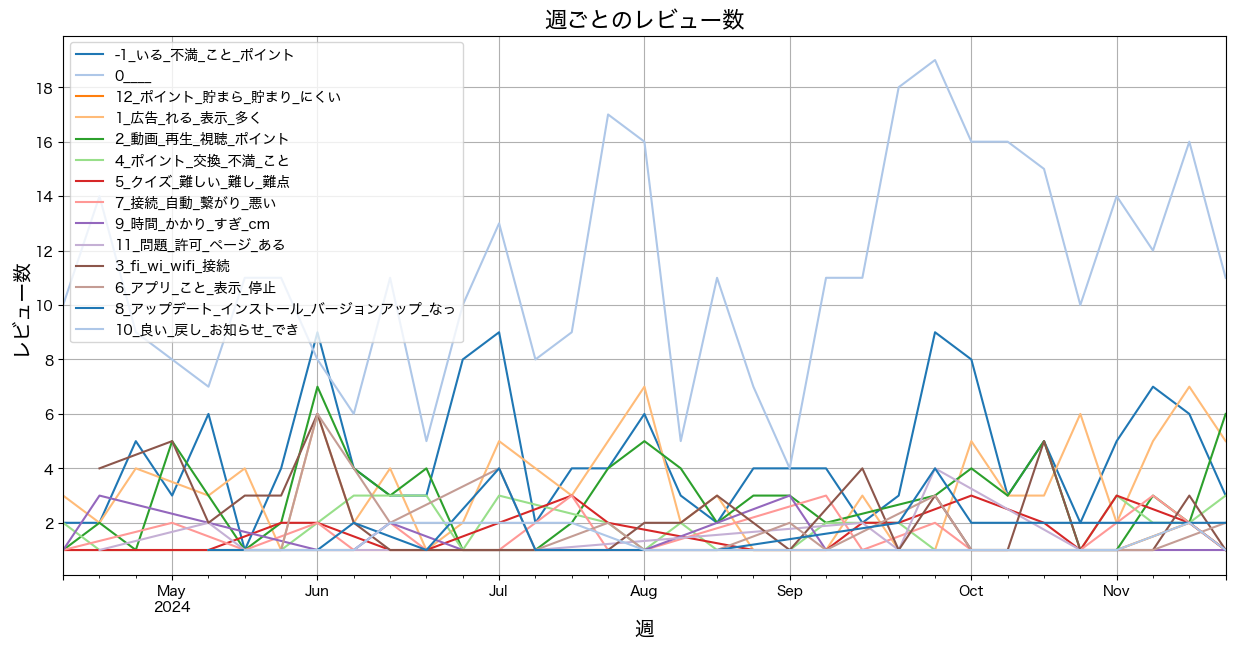

In [15]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rcParams

# フォントをIPAフォントに設定
rcParams['font.family'] = 'Hiragino Sans'

# カラーマップから12色を取得
colors = plt.cm.tab20.colors[:12]

# プロット例
fig, ax = plt.subplots(figsize=(15, 7))

# トピックごとに色を設定
for i, topic_name in enumerate(weekly_review_counts['topic_name'].unique()):
    color = colors[i % len(colors)]  # 12色を循環
    weekly_review_counts[weekly_review_counts['topic_name'] == topic_name].plot(
        x='week', 
        y='review_count', 
        ax=ax, 
        label=topic_name, 
        color=color
    )
    
    
# 縦軸を整数に設定
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.title('週ごとのレビュー数', fontsize=16)  # 日本語タイトル
plt.xlabel('週', fontsize=14)  # 日本語ラベル
plt.ylabel('レビュー数', fontsize=14)  # 日本語ラベル
plt.grid()
plt.legend()
plt.show()


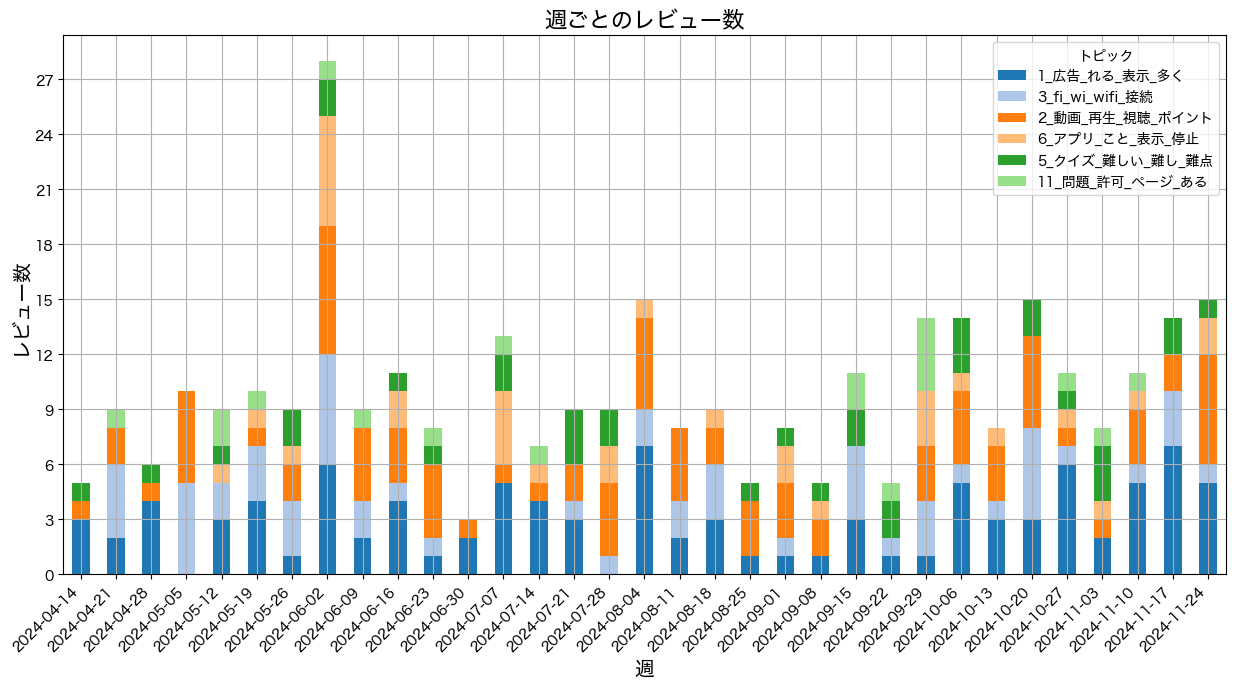

In [17]:
# トピック11を追加する前にリセット
top_topics = pd.Index(['1_広告_れる_表示_多く', '3_fi_wi_wifi_接続', '2_動画_再生_視聴_ポイント', '6_アプリ_こと_表示_停止',
                       '5_クイズ_難しい_難し_難点'])

# トピック11を追加
top_topics = top_topics.append(pd.Index(['11_問題_許可_ページ_ある']))

# トピック-1と0を除外
pivot_df_filtered = pivot_df[top_topics]

# プロット例
fig, ax = plt.subplots(figsize=(15, 7))

# 積み上げ棒グラフを作成
pivot_df_filtered.plot(kind='bar', stacked=True, ax=ax, color=colors[:len(top_topics)])

# 縦軸を整数に設定
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# 週のラベルを見やすくする
ax.set_xticklabels(pivot_df_filtered.index.strftime('%Y-%m-%d'), rotation=45, ha='right')

plt.title('週ごとのレビュー数', fontsize=16)  # 日本語タイトル
plt.xlabel('週', fontsize=14)  # 日本語ラベル
plt.ylabel('レビュー数', fontsize=14)  # 日本語ラベル
plt.grid()
plt.legend(title='トピック')
plt.show()
